In [1]:
%matplotlib inline
from pathlib import Path

datasets_path = Path("../datasets")

In [2]:
import polars as pl
import polars.selectors as cs

train_csv_path = datasets_path / "train.csv"
test_csv_path = datasets_path / "test.csv"

train_df = pl.read_csv(train_csv_path)
test_df = pl.read_csv(test_csv_path)

In [3]:
train_df.describe()

shape: (9, 9)
┌────────────┬───────────┬───────────┬────────┬───┬──────────┬────────┬───────────┬──────────┐
│ statistic  ┆ id        ┆ age       ┆ sex    ┆ … ┆ children ┆ smoker ┆ region    ┆ charges  │
│ ---        ┆ ---       ┆ ---       ┆ ---    ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ---      │
│ str        ┆ f64       ┆ f64       ┆ str    ┆   ┆ f64      ┆ str    ┆ str       ┆ f64      │
╞════════════╪═══════════╪═══════════╪════════╪═══╪══════════╪════════╪═══════════╪══════════╡
│ count      ┆ 1600.0    ┆ 1600.0    ┆ 1600   ┆ … ┆ 1600.0   ┆ 1600   ┆ 1600      ┆ 1600.0   │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0      ┆ … ┆ 0.0      ┆ 0      ┆ 0         ┆ 0.0      │
│ mean       ┆ 1007.8625 ┆ 38.985    ┆ null   ┆ … ┆ 1.014375 ┆ null   ┆ null      ┆ 0.30625  │
│ std        ┆ 575.26841 ┆ 13.555012 ┆ null   ┆ … ┆ 1.259031 ┆ null   ┆ null      ┆ 0.628656 │
│ min        ┆ 0.0       ┆ 18.0      ┆ female ┆ … ┆ 0.0      ┆ no     ┆ northeast ┆ 0.0      │
│ 25%        ┆ 516.0     ┆ 27.0      ┆ null   ┆ … ┆ 0.0      ┆ null   ┆ null      ┆ 0.0      │
│ 50%        ┆ 1011.0    ┆ 40.0      ┆ null   ┆ … ┆ 1.0      ┆ null   ┆ null      ┆ 0.0      │
│ 75%        ┆ 1509.0    ┆ 50.0      ┆ null   ┆ … ┆ 2.0      ┆ null   ┆ null      ┆ 0.0      │
│ max        ┆ 1999.0    ┆ 64.0      ┆ male   ┆ … ┆ 5.0      ┆ yes    ┆ southwest ┆ 2.0      │
└────────────┴───────────┴───────────┴────────┴───┴──────────┴────────┴───────────┴──────────┘

In [4]:
test_df.describe()

shape: (9, 8)
┌────────────┬────────────┬───────────┬────────┬───────────┬──────────┬────────┬───────────┐
│ statistic  ┆ id         ┆ age       ┆ sex    ┆ bmi       ┆ children ┆ smoker ┆ region    │
│ ---        ┆ ---        ┆ ---       ┆ ---    ┆ ---       ┆ ---      ┆ ---    ┆ ---       │
│ str        ┆ f64        ┆ f64       ┆ str    ┆ f64       ┆ f64      ┆ str    ┆ str       │
╞════════════╪════════════╪═══════════╪════════╪═══════════╪══════════╪════════╪═══════════╡
│ count      ┆ 400.0      ┆ 400.0     ┆ 400    ┆ 400.0     ┆ 400.0    ┆ 400    ┆ 400       │
│ null_count ┆ 0.0        ┆ 0.0       ┆ 0      ┆ 0.0       ┆ 0.0      ┆ 0      ┆ 0         │
│ mean       ┆ 966.05     ┆ 39.23     ┆ null   ┆ 32.668659 ┆ 0.9425   ┆ null   ┆ null      │
│ std        ┆ 585.848127 ┆ 12.990149 ┆ null   ┆ 5.9328    ┆ 1.219801 ┆ null   ┆ null      │
│ min        ┆ 13.0       ┆ 18.0      ┆ female ┆ 21.848978 ┆ 0.0      ┆ no     ┆ northeast │
│ 25%        ┆ 432.0      ┆ 28.0      ┆ null   ┆ 28.712189 ┆ 0.0      ┆ null   ┆ null      │
│ 50%        ┆ 972.0      ┆ 40.0      ┆ null   ┆ 32.288571 ┆ 0.0      ┆ null   ┆ null      │
│ 75%        ┆ 1458.0     ┆ 50.0      ┆ null   ┆ 37.110462 ┆ 2.0      ┆ null   ┆ null      │
│ max        ┆ 1995.0     ┆ 64.0      ┆ male   ┆ 46.890354 ┆ 5.0      ┆ yes    ┆ southwest │
└────────────┴────────────┴───────────┴────────┴───────────┴──────────┴────────┴───────────┘

## ydata-profiling

In [5]:
from ydata_profiling import ProfileReport

train_profile = ProfileReport(
    train_df.to_pandas(), title="Train data profile", explorative=True
)
test_profile = ProfileReport(
    test_df.to_pandas(), title="Train data profile", explorative=True
)

In [6]:
train_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
test_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## PairPlot

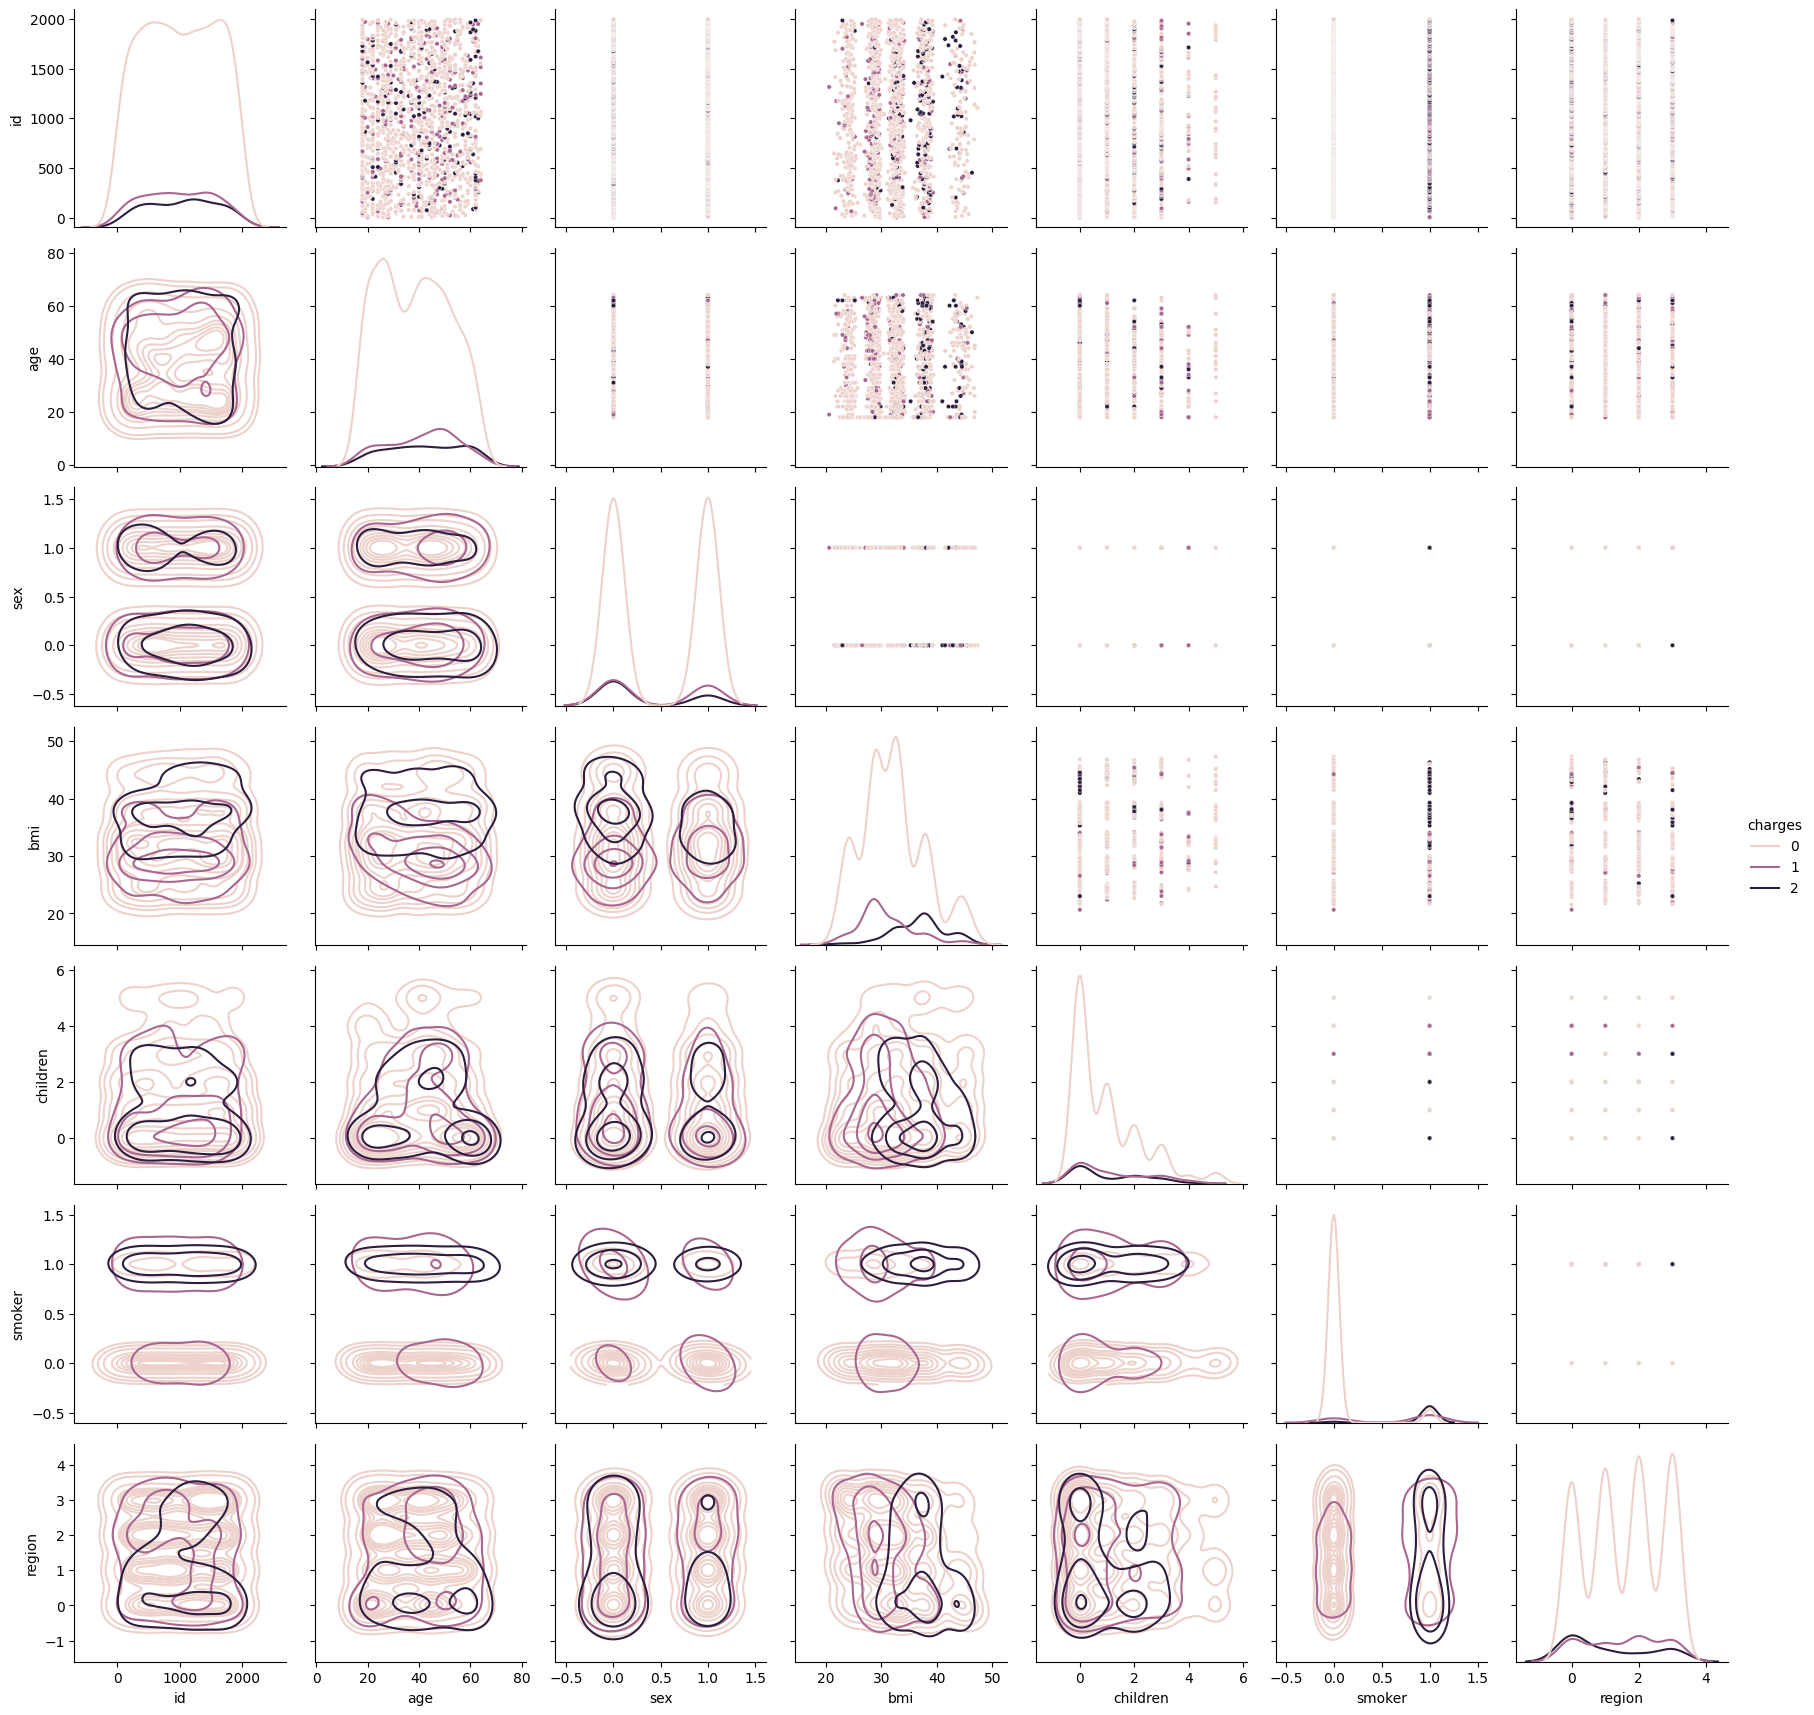

In [8]:
import seaborn as sns

plot_df = train_df.with_columns(pl.col("charges").cast(pl.Utf8)).to_pandas()

g = sns.PairGrid(
    train_df.with_columns(cs.string().cast(pl.Categorical))
    .with_columns(cs.categorical().to_physical())
    .to_pandas(),
    diag_sharey=False,
    hue="charges",
)
g.map_upper(sns.scatterplot, s=10)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

g

## chargesとの分布確認

In [9]:
train_df.describe()

shape: (9, 9)
┌────────────┬───────────┬───────────┬────────┬───┬──────────┬────────┬───────────┬──────────┐
│ statistic  ┆ id        ┆ age       ┆ sex    ┆ … ┆ children ┆ smoker ┆ region    ┆ charges  │
│ ---        ┆ ---       ┆ ---       ┆ ---    ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ---      │
│ str        ┆ f64       ┆ f64       ┆ str    ┆   ┆ f64      ┆ str    ┆ str       ┆ f64      │
╞════════════╪═══════════╪═══════════╪════════╪═══╪══════════╪════════╪═══════════╪══════════╡
│ count      ┆ 1600.0    ┆ 1600.0    ┆ 1600   ┆ … ┆ 1600.0   ┆ 1600   ┆ 1600      ┆ 1600.0   │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0      ┆ … ┆ 0.0      ┆ 0      ┆ 0         ┆ 0.0      │
│ mean       ┆ 1007.8625 ┆ 38.985    ┆ null   ┆ … ┆ 1.014375 ┆ null   ┆ null      ┆ 0.30625  │
│ std        ┆ 575.26841 ┆ 13.555012 ┆ null   ┆ … ┆ 1.259031 ┆ null   ┆ null      ┆ 0.628656 │
│ min        ┆ 0.0       ┆ 18.0      ┆ female ┆ … ┆ 0.0      ┆ no     ┆ northeast ┆ 0.0      │
│ 25%        ┆ 516.0     ┆ 27.0      ┆ null   ┆ … ┆ 0.0      ┆ null   ┆ null      ┆ 0.0      │
│ 50%        ┆ 1011.0    ┆ 40.0      ┆ null   ┆ … ┆ 1.0      ┆ null   ┆ null      ┆ 0.0      │
│ 75%        ┆ 1509.0    ┆ 50.0      ┆ null   ┆ … ┆ 2.0      ┆ null   ┆ null      ┆ 0.0      │
│ max        ┆ 1999.0    ┆ 64.0      ┆ male   ┆ … ┆ 5.0      ┆ yes    ┆ southwest ┆ 2.0      │
└────────────┴───────────┴───────────┴────────┴───┴──────────┴────────┴───────────┴──────────┘

<Axes: xlabel='age', ylabel='charges'>

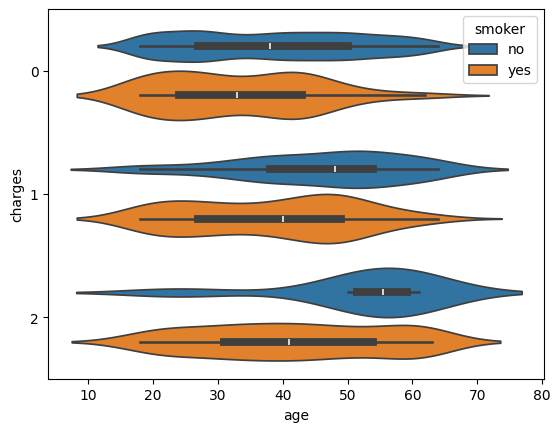

In [10]:
sns.violinplot(plot_df, x="age", y="charges", hue="smoker")

<Axes: xlabel='sex', ylabel='charges'>

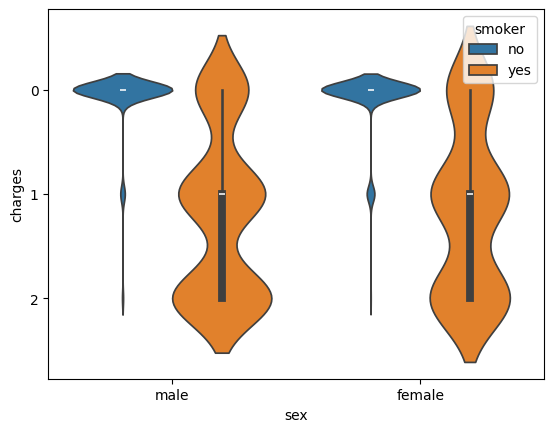

In [11]:
sns.violinplot(plot_df, x="sex", y="charges", hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

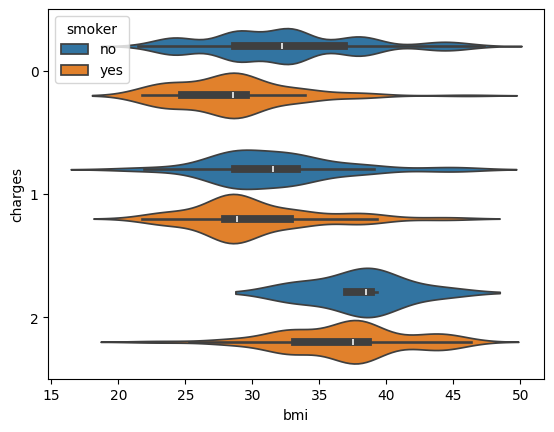

In [12]:
sns.violinplot(plot_df, x="bmi", y="charges", hue="smoker")

<Axes: xlabel='children', ylabel='charges'>

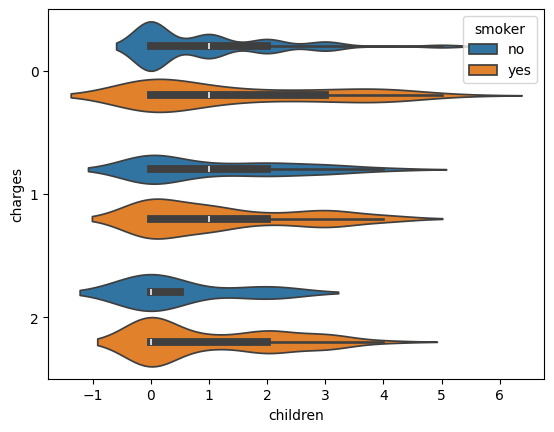

In [13]:
sns.violinplot(plot_df, x="children", y="charges", hue="smoker")

<Axes: xlabel='smoker', ylabel='charges'>

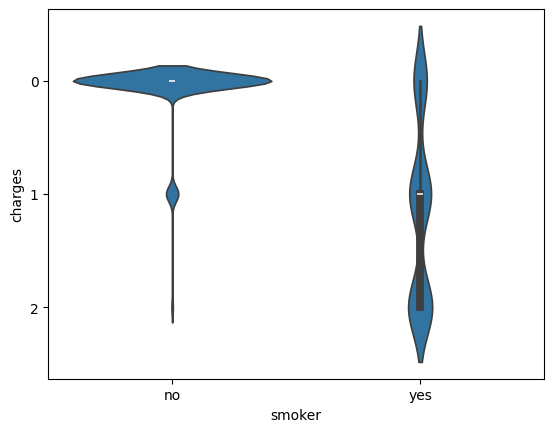

In [14]:
sns.violinplot(plot_df, x="smoker", y="charges")

<Axes: xlabel='region', ylabel='charges'>

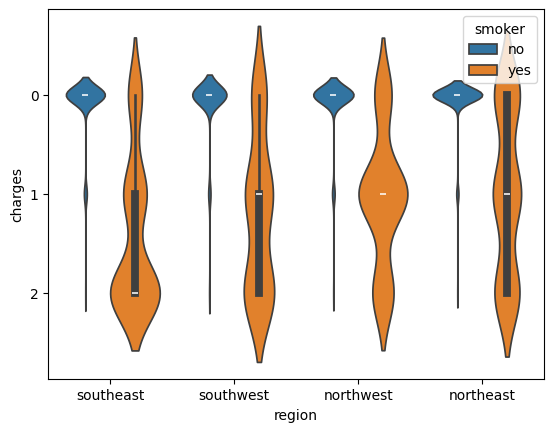

In [15]:
sns.violinplot(plot_df, x="region", y="charges", hue="smoker")

`smoker`と`bmi`が顕著に影響していそう。`age`も若干影響があるかも  

それ以外の`sex`,`children`,`region`はあまり関係がなさそうに見える

## LightGBMによるimportance

### データのセットアップ

In [16]:
import lightgbm as lgb

from sklearn.metrics import f1_score
import numpy as np


def f1_macro_score(y_pred: np.ndarray, data: lgb.Dataset):
    y_true = data.get_label()

    y_pred = y_pred.reshape(len(np.unique(y_true)), -1).argmax(axis=0)
    score = f1_score(y_true, y_pred, average="macro")

    return "macro_f1", score, True

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

feature_names = train_df.select(cs.exclude(["id", "charges"])).columns
cat_list = train_df.select(cs.exclude("id")).select(cs.string()).columns
tmp_df = train_df.with_columns(cs.string().cast(pl.Categorical))
# .with_columns(pl.col(pl.Categorical).to_physical())

X = tmp_df.select(cs.exclude(["id", "charges"])).to_pandas().copy()
Y = tmp_df.get_column("charges").to_pandas().copy()

train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=0.1, random_state=123, stratify=Y
)

train_weight = compute_sample_weight(class_weight="balanced", y=train_Y).astype(
    "float32"
)


In [18]:
params = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "first_metric_only": True,
    "num_class": 3,
    "random_state": 123,
    "device": "cpu",
    # Parameters
    "learning_rate": 0.01,
    # "extra_trees": True,
    "feature_fraction": 0.8,  # default = 1.0
    "bagging_freq": 5,  # default = 0
    "bagging_fraction": 0.8,
    "lambda_l1": 2,
    "lambda_l2": 2,
    "verbose": -1,
}

fit_params = {
    "callbacks": [
        lgb.early_stopping(stopping_rounds=100, verbose=True),
        lgb.log_evaluation(100),
    ],
    "feval": f1_macro_score,
}

In [19]:
lgb_train = lgb.Dataset(
    train_X,
    label=train_Y,
    weight=train_weight,
)
lgb_test = lgb.Dataset(
    test_X,
    label=test_Y,
)

In [20]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 250 to 245
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1440 non-null   int64   
 1   sex       1440 non-null   category
 2   bmi       1440 non-null   float64 
 3   children  1440 non-null   int64   
 4   smoker    1440 non-null   category
 5   region    1440 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 49.7 KB


In [21]:
model = lgb.train(
    params=params,
    train_set=lgb_train,
    num_boost_round=1000000,
    valid_sets=[lgb_train, lgb_test],
    **fit_params,
)

Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.670244	training's macro_f1: 0.261647	valid_1's multi_logloss: 0.685446	valid_1's macro_f1: 0.300819
Early stopping, best iteration is:
[87]	training's multi_logloss: 0.697894	training's macro_f1: 0.260698	valid_1's multi_logloss: 0.70679	valid_1's macro_f1: 0.311255


In [22]:
from sklearn.metrics import classification_report

pred_Y = model.predict(test_X)

print(
    classification_report(
        test_Y,
        np.argmax(pred_Y, axis=1),
    )
)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       125
           1       0.48      0.50      0.49        20
           2       0.78      0.93      0.85        15

    accuracy                           0.86       160
   macro avg       0.73      0.78      0.75       160
weighted avg       0.86      0.86      0.86       160



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

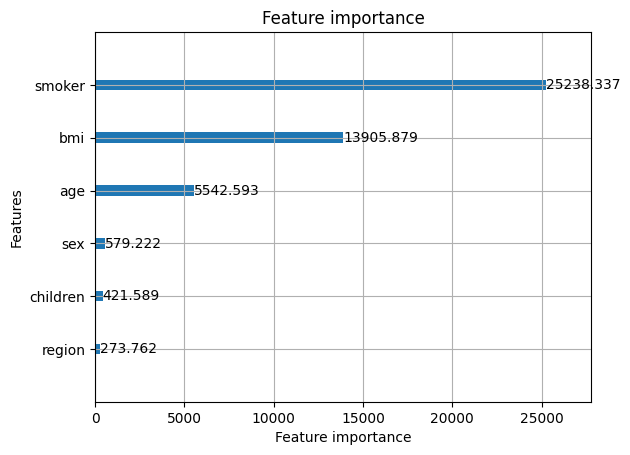

In [23]:
lgb.plot_importance(model, importance_type="gain")